![SegmentLocal](./images_STUDIP/Logo2.png)

# Chapter 1: Data Vizualization

### Motivation

In this chapter you will be given an introduction to Matplotlib and Seaborn which are amazing visualization libraries in Python for 2D plots of arrays. They come with a large variety of plots that will help you to visualize your data in a clear and concise way in order to 

1. get a feeling of how your data looks like, i.e. you can gather inital information on trends, patterns or correlations of your data before applying analyzing techniques 


2. to create adequate plots that make the information within your data accessible to others.

But choosing the right visualization is not always easy and depends highly on what kind of data you have and what information you want to convey. It always helps to try different visualization types because two visualizations on the same data may highlight different aspects of the data.

To give you an idea for the start you can use the below diagramm. Please note that this is only a loose guide you should not rely on too much.

<figure>
	<img src="https://www.datapine.com/blog/wp-content/uploads/2019/05/data-visualization-types-overview.png" alt="drawing" width="530" style="float: left; margin-right: 500px;" />
    <figcaption> 
        Overview of Data Visualization Types. Source: <br>
        <a href="https://www.datapine.com/blog/how-to-choose-the-right-data-visualization-types/">https://www.datapine.com/blog/how-to-choose-the-right-data-visualization-types/</a>     </figcaption>
</figure>

## 1. The Basic: Plotting with Matplotlib

### 1.1 The Matplotlib Object Hierarchy

<figure>
    <table> <tr>
    <td> <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" alt="drawing" width="375" style="float: left;" /> </td>
    <td> <img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png" alt="drawing" width="330" style="float: left; margin-right: 200px;" /> </td>
    </tr> </table>
    <figcaption>
        Anatomy of a Matplotlib Figure. Source: 
        <a href="https://realpython.com/python-matplotlib-guide/"> 
            https://realpython.com/python-matplotlib-guide/</a>     
    </figcaption>
</figure>

To get a better understanding of what we create throughout our journey have a closer look on the depictions above.

On the left hand side you can see the general object hierarchy in matplotlib. A figure object is the outermost container for a matplotlib graphic, which can contain multiple axes objects. One source of confusion is the name: an axes actually translates into what we think of as a plotting area (rather than the plural of “axis,” as we might expect).

On the right hand side you can see the anatomy of a figure, which shows smaller objects such as tick marks, individual lines, legends, and text boxes that are below the axes in the hierarchy. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels. But we will have a closer look on that later.

### 1.2 Stateful vs stateless approach

You will often see two different approaches when you look for plotting examples on the internet. In these examples either the stateful (state-based) or the stateless (object-oriented) approach is used. The differences between them may not be clear at first sight, but they will become clearer with the following plotting example.


**The stateful approach:**

```python
import matplotlib.pyplot as plt

plt.figure()
plt.plot([0,1], [1,0])
```

**The stateless approach:**

```python 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0,1], [1,0])
```

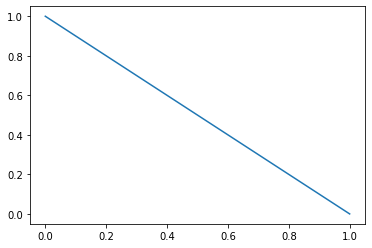

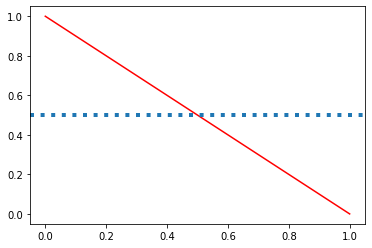

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([0,1], [1,0])

fig, ax = plt.subplots()
ax.plot([0,1], [1,0], color='red')
ax.axhline(0.5, linestyle=':', linewidth=4)

Both of the approaches carry out the same steps:

- Create a figure object (with a plotting area).
- Create a line plot into the plotting area.

The only difference lies within the object-oriented form. In the stateless approach we do the operations above rather explicitly and take the object references into variables (fig, ax). Calling methods of the axes object (ax) we can directly modify the underlying objects. The references are not lost in the stateful approach, either, but they are stored somewhere behind the scenes. There is only ever one figure or axes that you’re manipulating at a given time, and you don’t need to explicitly refer to it.

The stateful approach is really good for creating quick plots. But when it comes to more complex plots it will get messy very quick. Thus we will concentrate mostly on using the stateless approach in this course.

### 1.3 How to create single plots

The most common way to create a figure with a single axes (plotting area) is with [```plt.subplots()```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html):  

```python
fig, ax = plt.subplots()
```

Notice that if we don't pass any arguments to `plt.subplots()`, so the default call is executed: `plt.subplots(nrows=1, ncols=1)`. Consequently, ax is created as a single AxesSubplot object, that we can modify with different methods. We will show some of these methods in the following example:

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


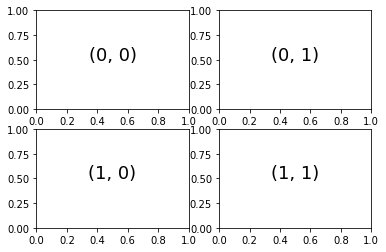

In [23]:
fig, ax = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')


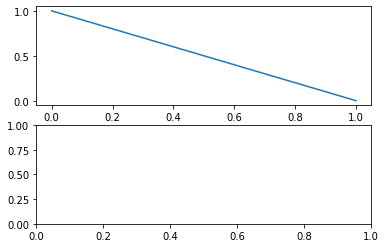

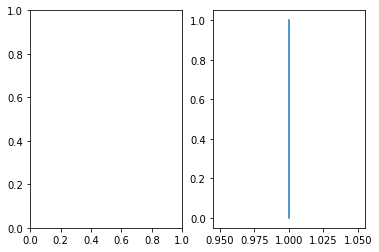

In [31]:
fig1, ax1 = plt.subplots(nrows=2,ncols=1)
ax1[0].plot([0, 1], [1, 0])
fig2, ax2 = plt.subplots(nrows=1,ncols=2)
ax2[1].plot([1, 1], [1, 0])

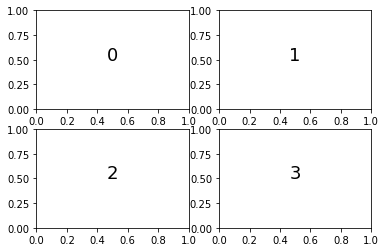

In [24]:
fig, ax = plt.subplots(2,2)
ax = ax.ravel()
for i in range(4):
    ax[i].text(0.5, 0.5, str(i), fontsize=18, ha='center')


Using the indices of each axes object we can easily fill in the plots in the plotting areas.

In [13]:
penguins = sns.load_dataset('penguins')

In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [32]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [78]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [79]:
penguins.isna().mean()

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [33]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [35]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [36]:
penguins.sex.unique()

array(['Male', 'Female', nan], dtype=object)

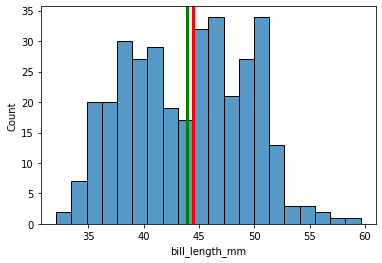

In [40]:
fig, ax = plt.subplots()

ax = sns.histplot(data=penguins, x='bill_length_mm', bins=20)
ax.axvline(penguins.bill_length_mm.mean(), linewidth=3, color='green')
ax.axvline(penguins.bill_length_mm.median(), linewidth=3, color='red')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

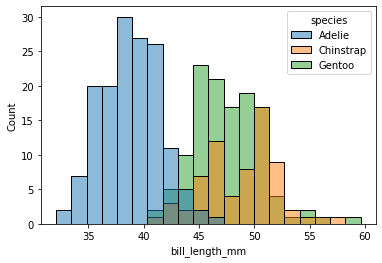

In [42]:
fig, ax = plt.subplots()

ax = sns.histplot(data=penguins, x='bill_length_mm', hue='species', bins=20)

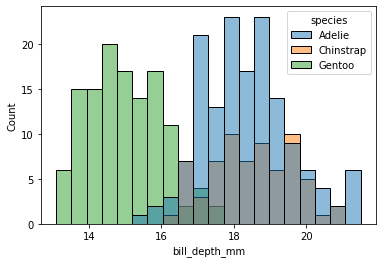

In [43]:
fig, ax = plt.subplots()

ax = sns.histplot(data=penguins, x='bill_depth_mm', hue='species', bins=20)

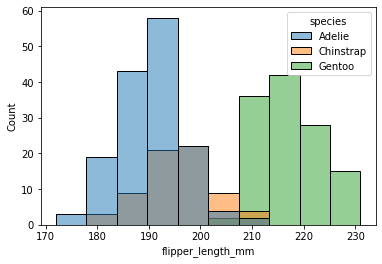

In [47]:
fig, ax = plt.subplots()

ax = sns.histplot(data=penguins, x='flipper_length_mm', hue='species',)

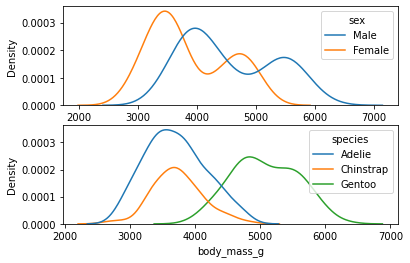

In [50]:
fig, ax = plt.subplots(2,1)

ax[0] = sns.kdeplot(data=penguins, x='body_mass_g', hue='sex', ax=ax[0])
ax[1] = sns.kdeplot(data=penguins, x='body_mass_g', hue='species', ax=ax[1])

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

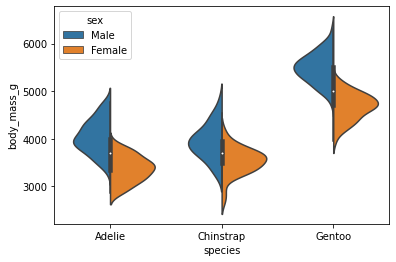

In [52]:
sns.violinplot(
    data=penguins, 
    x='species', 
    y='body_mass_g', 
    hue='sex', 
    split=True
)

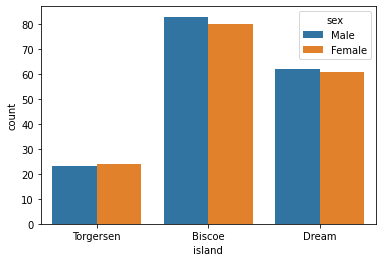

In [61]:
sns.countplot(
    data=penguins, 
    x='island', 
    hue='sex', 
#     split=True
);

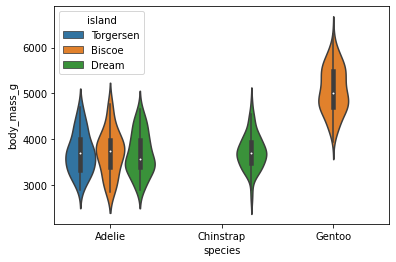

In [62]:
sns.violinplot(
    data=penguins, 
    x='species', 
    y='body_mass_g', 
    hue='island', 
#     split=True
);

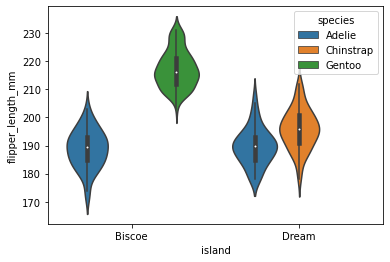

In [77]:
sns.violinplot(
    data=penguins.query('island !="Torgersen"'), 
    x='island', 
    y='flipper_length_mm', 
    hue='species',
    inner='box'
#     split=True
);

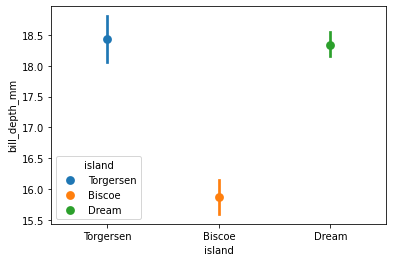

In [76]:
sns.pointplot(
    data=penguins,
    x='island',
    y='bill_depth_mm',
    ci=95,
    join='False',
    hue='island'
);

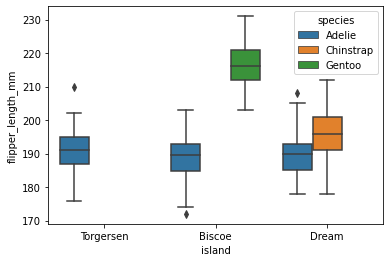

In [69]:
sns.boxplot(
    data=penguins, 
    x='island', 
    y='flipper_length_mm', 
    hue='species',
#     split=True
);

## Observations

- the Biscoe island only has Gentoo and Adelie species
- The Dream island only has Chinstrapand Adelie species
- the Adelie species is found on all 3 islands
- the sexes of all species are roughly equal
- for all species males are heavier than females
- Gentoo species are heavier than all others